In [15]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set_style("dark")
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

%pylab inline
# These are the imports necessary

train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
tlabel = train["label"]
train = train.drop("label",1)

# Reading the data and making it suitable for machine learning
print "Done successfully !"


Populating the interactive namespace from numpy and matplotlib


C:\Users\Amil Khare\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Done successfully !


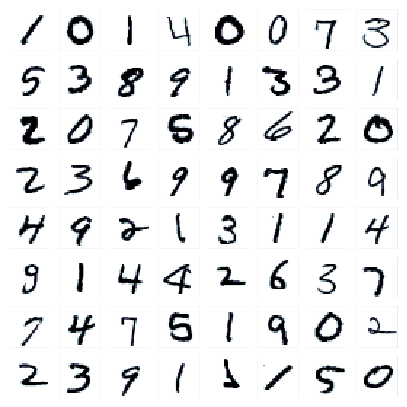

In [16]:
def evaluate_classifier(clf, data, target, split_ratio):
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    clf.fit(trainX, trainY)
    return clf.score(testX,testY)


figure(figsize(5,5))
for digit_num in range(0,64):
    subplot(8,8,digit_num+1)
    grid_data = train.iloc[digit_num].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")
    xticks([])
    yticks([])

In [18]:
# Simple Random Forest
a = [1,5,10,15,20,25,35,55,80,100,150,250,400,550,650,720,800,900,1000]
samples = 100
length = len(a)
score_mean =np.zeros(length)
score_std = np.zeros(length)
i=0
for j in a:
    score =np.zeros(samples)
    for k in range(0,samples):
        clf = RandomForestClassifier(n_estimators = j, n_jobs=1, criterion="gini")
        score[k] = evaluate_classifier(clf, train.iloc[0:1000], tlabel.iloc[0:1000], 0.8)
    score_mean[i], score_std[i] = mean(score), std(score)
    i=i+1

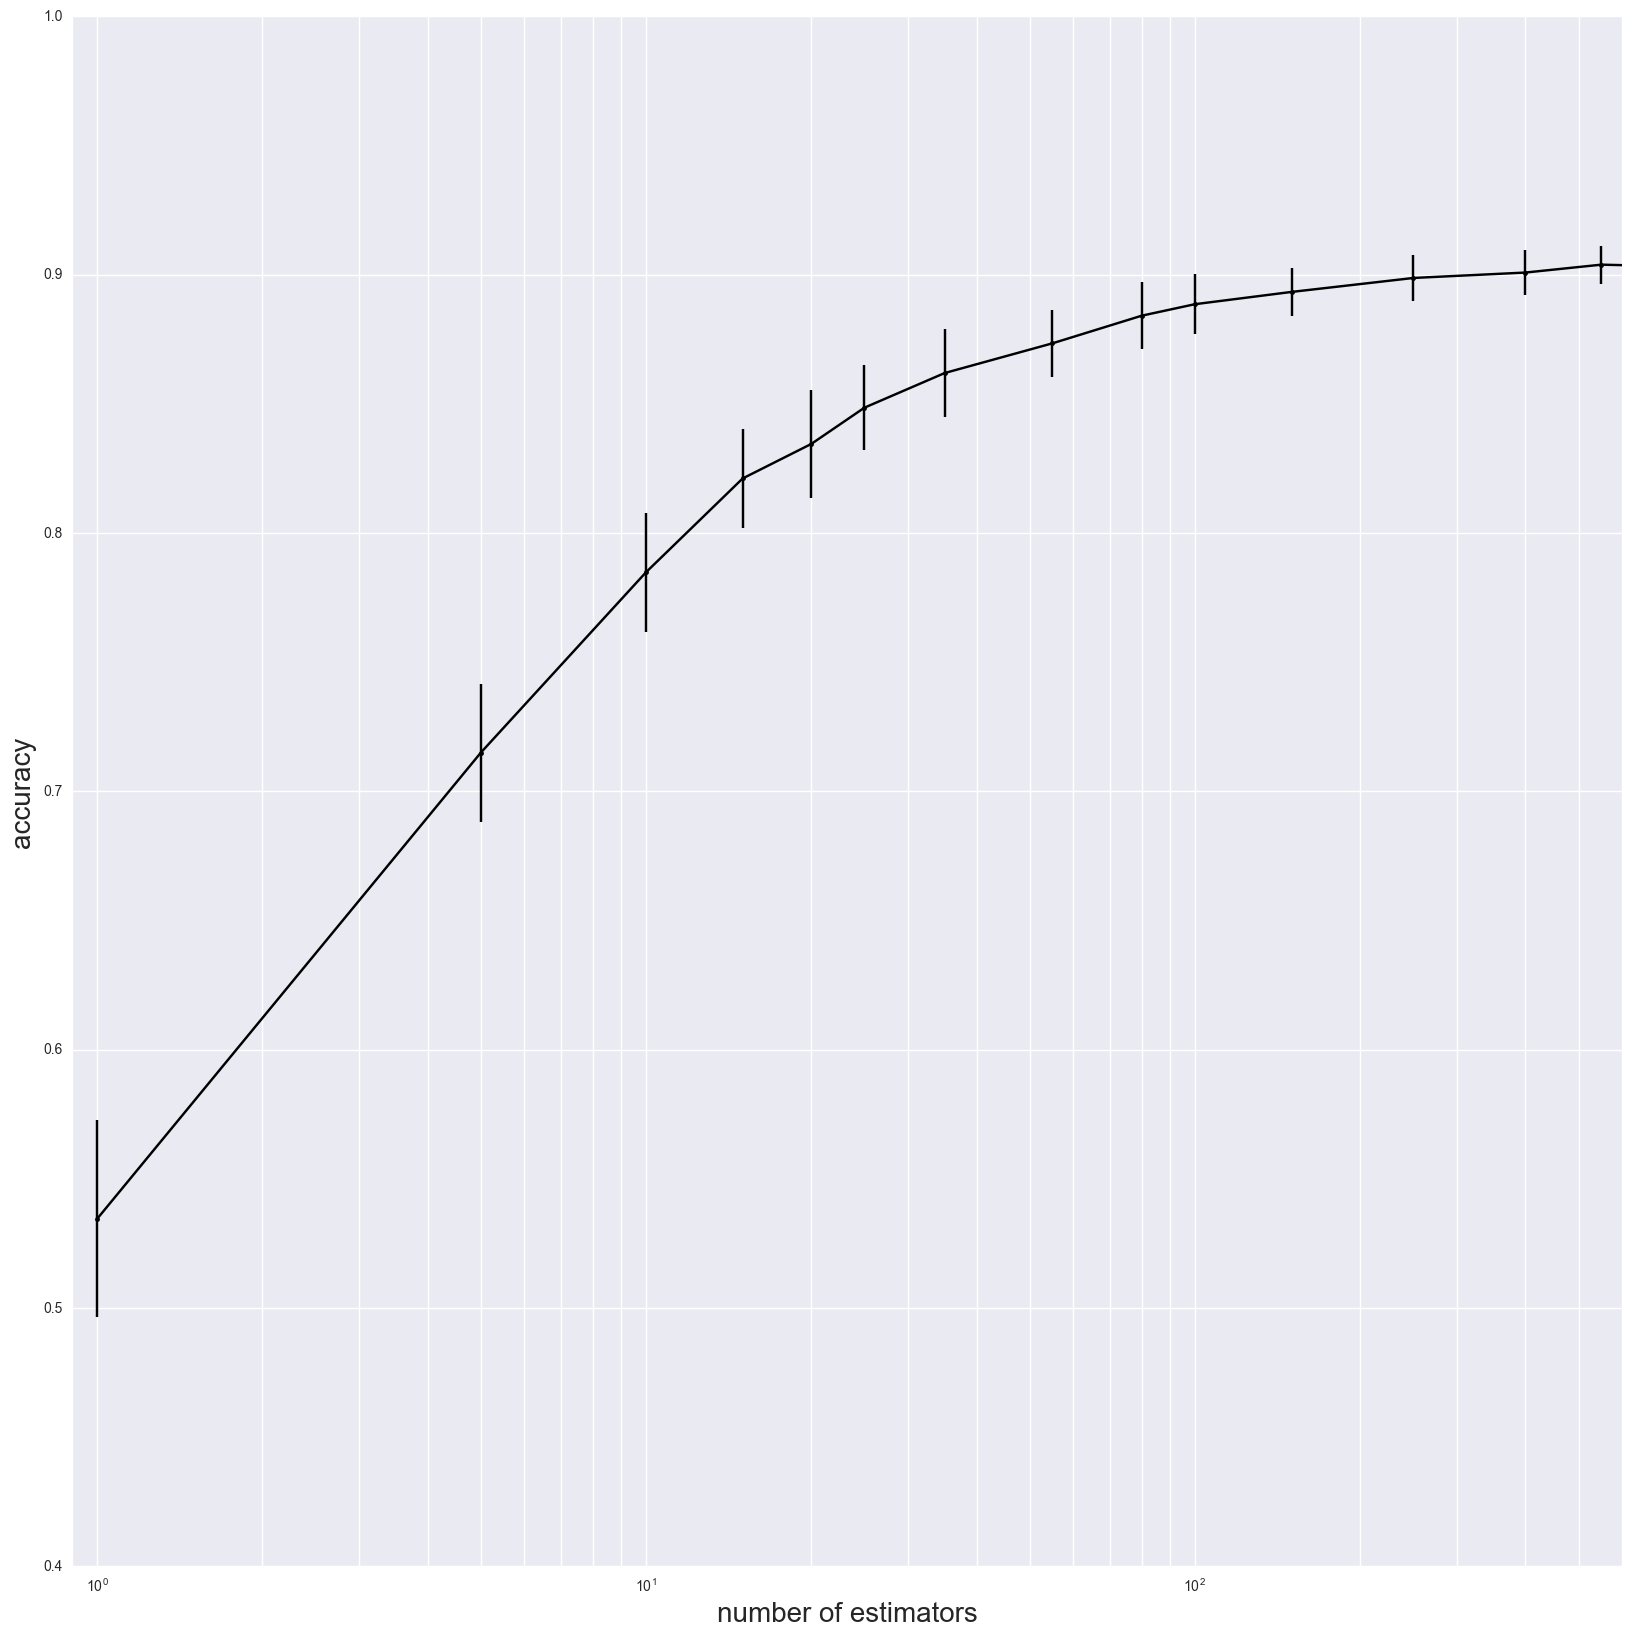

In [19]:
figure(figsize(20,20))
errorbar(a, score_mean, yerr=score_std, fmt='k.-')
xscale("log")
xlabel("number of estimators",size = 20)
ylabel("accuracy",size = 20)
xlim(0.9,600)
grid(which="both")

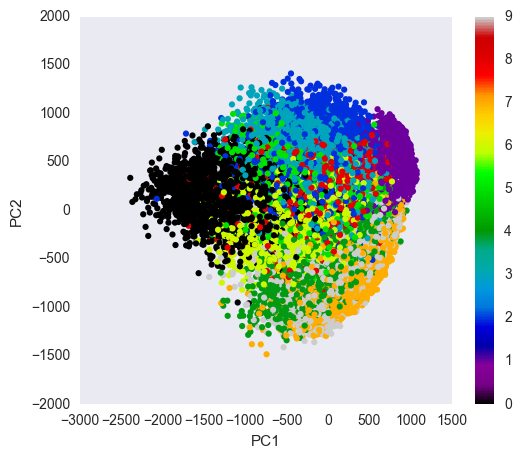

In [21]:
# Now applying knn and using PCA identifying important features
pca = PCA(n_components=2)
pca.fit(train)
transform = pca.transform(train)

figure(figsize(6,5))
plt.scatter(transform[:,0],transform[:,1], s=20, c = tlabel, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
clim(0,9)

xlabel("PC1")
ylabel("PC2")

In [24]:
b = [1,5,10,15,20,25,35,55,80,100,150,250,400,550,650,720]
var = np.zeros(len(b))
i=0;
for j in b:
    pca = PCA(n_components=j)
    pca.fit(train)
    var[i] = sum(pca.explained_variance_ratio_)
    i=i+1   

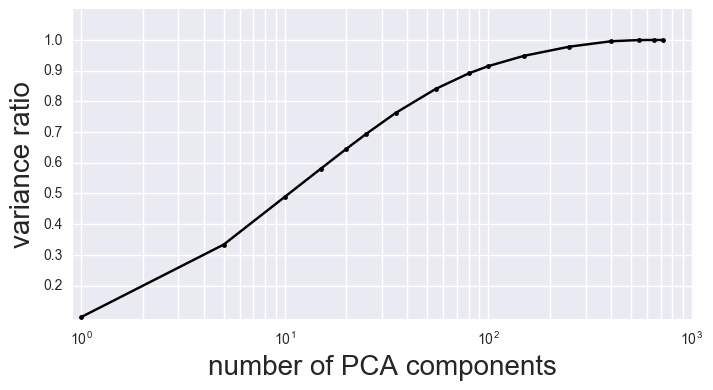

In [25]:
figure(figsize(8,4))
plot(b,var,'k.-')
xscale("log")
ylim(9e-2,1.1)
yticks(linspace(0.2,1.0,9))
xlim(0.9)
grid(which="both")
xlabel("number of PCA components",size=20)
ylabel("variance ratio",size=20)

In [26]:
clf = KNeighborsClassifier()
c = [1,5,10,15,20,25,35,55,80,100,150,250,400,550,650,720]
scoree= np.zeros(len(c))
i=0
for j in c:
    pca = PCA(n_components=j)
    pca.fit(train)
    transform = pca.transform(train.iloc[0:1000])
    scoree[i] = evaluate_classifier(clf, transform, tlabel.iloc[0:1000], 0.8)
    i=i+1

0.905


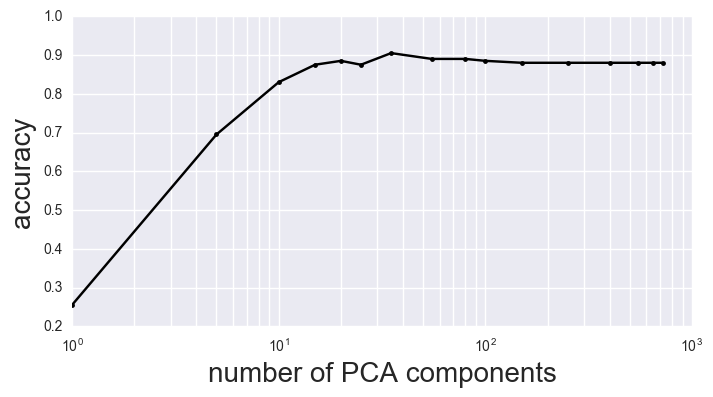

In [35]:
figure(figsize(8,4))
plot(c,scoree,'k.-')
xscale('log')
xlabel("number of PCA components", size=20)
print max(scoree)
ylabel("accuracy", size=20)
grid(which="both")

In [29]:
# random forest classification

clf = RandomForestClassifier(n_estimators = 100, n_jobs=1, criterion="gini")
clf.fit(train, tlabel)
results=clf.predict(test)

# prepare submit file

np.savetxt('results.csv', 
           np.c_[range(1,len(test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

# Kaggle score ~0.96

In [36]:
pca = PCA(n_components=50)
pca.fit(train)
transform_train = pca.transform(train)
transform_test = pca.transform(test)

clf = KNeighborsClassifier()
clf.fit(transform_train, tlabel)
results=clf.predict(transform_test)

# prepare submit file

np.savetxt('results2.csv', 
           np.c_[range(1,len(test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')